<a href="https://colab.research.google.com/github/keithferns98/ML_Models/blob/main/Decision_ensemble_imbalanced_corrremoval.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

In [4]:
df_wine=pd.read_csv('winequality-red.csv')
df_wine.head(20)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.500,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [9]:
dff=df_wine
dff.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [12]:
#check for correlation above 0.55
cor=dff.corr()
cor.loc[:,:]=np.tril(cor,k=-1)
cor=cor.stack()
cor[(cor > 0.55) | (cor<-0.55)]

citric acid           fixed acidity          0.671703
                      volatile acidity      -0.552496
total sulfur dioxide  free sulfur dioxide    0.667666
density               fixed acidity          0.668047
pH                    fixed acidity         -0.682978
dtype: float64

In [3]:
df_wine.shape

(1599, 12)

In [4]:
df_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df_wine.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
df_wine.size

19188

In [7]:
df_wine.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


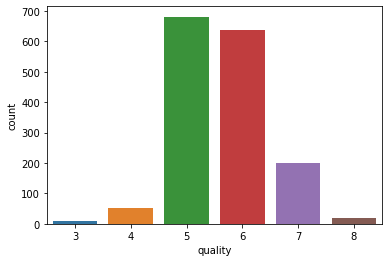

In [8]:
sns.countplot(df_wine['quality'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


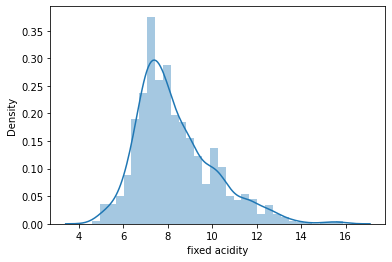

In [9]:
sns.distplot(df_wine['fixed acidity'])

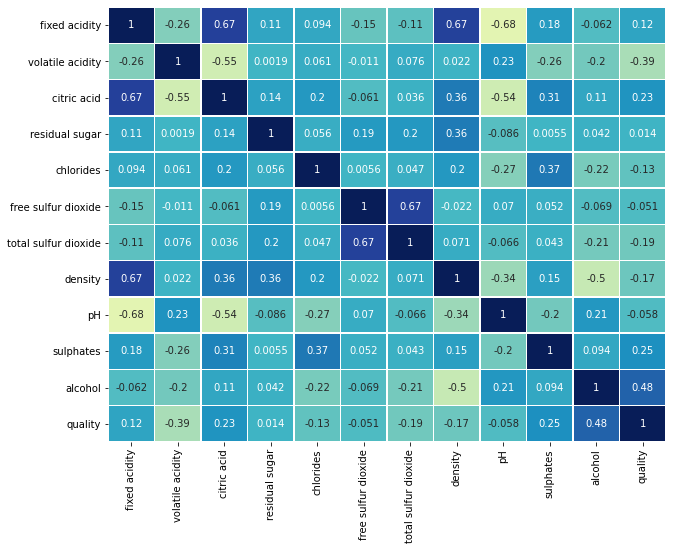

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(df_wine.corr(),
            annot=True,
            linewidth=.5,
            center=0,
            cbar=False,
            cmap='YlGnBu')
plt.show()

In [11]:
df_wine['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

In [12]:
df_wine['quality']=df_wine['quality'].replace(8,7)
df_wine['quality']=df_wine['quality'].replace(3,5)
df_wine['quality']=df_wine['quality'].replace(4,5)
df_wine['quality'].value_counts()

5    744
6    638
7    217
Name: quality, dtype: int64

In [13]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df_wine.drop('quality',axis=1),df_wine['quality'],test_size=0.3,random_state=22)

In [14]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [15]:
model_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [16]:
model_entropy.score(X_train,y_train)

1.0

In [17]:
model_entropy.predict(X_test)

array([6, 6, 5, 6, 5, 5, 5, 6, 6, 6, 5, 6, 6, 6, 7, 5, 5, 7, 6, 5, 5, 6,
       6, 6, 5, 5, 6, 5, 5, 6, 6, 7, 6, 5, 5, 5, 6, 5, 6, 6, 6, 5, 6, 5,
       5, 6, 6, 7, 6, 5, 5, 5, 6, 6, 6, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5,
       6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 7, 5, 6, 6, 5, 6, 7, 5, 6, 6,
       5, 5, 5, 6, 6, 5, 7, 5, 6, 5, 6, 5, 7, 6, 7, 5, 6, 5, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 5, 5, 7, 5, 5, 6, 7, 6, 5, 5, 6, 6, 5, 5, 7, 5, 7,
       6, 6, 5, 6, 7, 5, 7, 7, 6, 6, 6, 6, 5, 7, 5, 7, 5, 5, 5, 5, 5, 7,
       7, 5, 6, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 6, 6, 6, 5, 5, 6, 6, 6, 5,
       6, 6, 7, 5, 5, 5, 7, 5, 6, 5, 6, 6, 5, 5, 6, 5, 5, 5, 5, 6, 6, 5,
       5, 5, 7, 5, 6, 6, 5, 5, 6, 6, 5, 5, 6, 6, 5, 5, 5, 5, 5, 5, 6, 6,
       6, 5, 5, 5, 5, 6, 7, 6, 7, 5, 5, 6, 7, 6, 6, 6, 5, 7, 5, 5, 7, 5,
       5, 5, 6, 7, 6, 6, 6, 6, 5, 6, 6, 7, 6, 6, 6, 6, 6, 6, 5, 5, 6, 5,
       5, 5, 5, 6, 5, 5, 6, 5, 7, 7, 7, 7, 5, 6, 5, 6, 5, 6, 6, 6, 5, 5,
       5, 5, 5, 5, 6, 5, 6, 5, 6, 6, 5, 5, 6, 6, 7,

In [18]:
model_entropy.score(X_test,y_test)

0.6520833333333333

In [19]:
clf_pruned=DecisionTreeClassifier(criterion='entropy',max_depth=5)
clf_pruned.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
clf_pruned.score(X_train,y_train)

0.6899016979445934

In [21]:
clf_pruned.score(X_test,y_test)

0.6395833333333333

Visualize the tee

In [22]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import graphviz
xvar=df_wine.drop('quality',axis=1)
feature_cols=xvar.columns

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


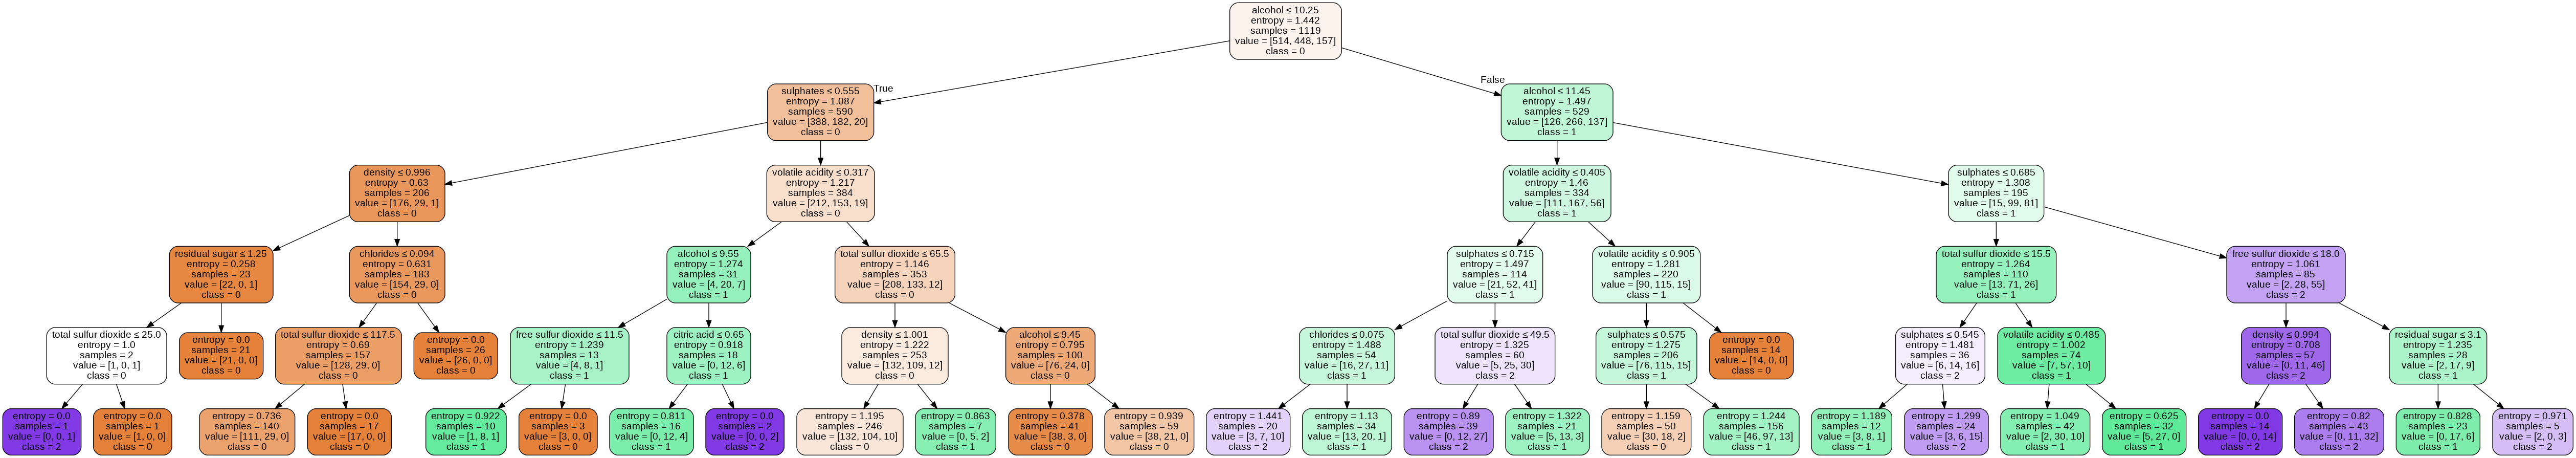

In [23]:
dot_data=StringIO()
export_graphviz(clf_pruned,out_file=dot_data,filled=True,rounded=True,special_characters=True,feature_names=feature_cols,class_names=['0','1','2'])
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('wine_pruned.png')
Image(graph.create_png())

In [24]:
preds=clf_pruned.predict(X_test)

In [25]:
acc_score=accuracy_score(y_test,preds)

In [26]:
acc_score

0.6395833333333333

In [27]:
feat_importance =clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict=dict(zip(feature_cols,clf_pruned.feature_importances_))
feat_imp=pd.DataFrame.from_dict(feat_imp_dict,orient='index')
feat_imp.sort_values(by=0,ascending=False)

,0
alcohol,0.432419
sulphates,0.175189
volatile acidity,0.154511
total sulfur dioxide,0.091483
density,0.039712
free sulfur dioxide,0.039127
chlorides,0.035495
residual sugar,0.025802
citric acid,0.006261
fixed acidity,0.000000


In [28]:
feat_imp_dict

{'alcohol': 0.43241941871764294,
 'chlorides': 0.0354951314495228,
 'citric acid': 0.006261343107885647,
 'density': 0.03971232180483624,
 'fixed acidity': 0.0,
 'free sulfur dioxide': 0.03912738954216763,
 'pH': 0.0,
 'residual sugar': 0.025801628064507712,
 'sulphates': 0.17518877171860717,
 'total sulfur dioxide': 0.09148274954753673,
 'volatile acidity': 0.15451124604729308}

In [34]:
result_df=pd.DataFrame({'Method':['Decision Tree'],'accuracy':acc_score})

In [35]:
result_df

,Method,accuracy
0,Decision Tree,0.639583


In [57]:
from sklearn.ensemble import RandomForestClassifier
rfcl=RandomForestClassifier(n_estimators=50)
rfcl.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=50,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [61]:
predrf=rfcl.predict(X_test)
accrf=accuracy_score(y_test,predrf)
rfcl.score(X_train,y_train)

1.0

In [78]:
result_rf=pd.DataFrame({'Method':['RandomForest'],'accuracy':[accrf]})
result_rf

,Method,accuracy
0,RandomForest,0.716667


In [62]:
from sklearn.ensemble import AdaBoostClassifier
adcl=AdaBoostClassifier(n_estimators=100,learning_rate=0.1,random_state=22)
adcl=adcl.fit(X_train,y_train)

In [63]:
pred_ad=adcl.predict(X_test)
acc_AD=accuracy_score(y_test,pred_ad)

In [79]:
result_ad=pd.DataFrame({'Method':['AdaBoostClassifier'],'accuracy':[acc_AD]})
result_ad

,Method,accuracy
0,AdaBoostClassifier,0.620833


In [66]:
from sklearn.ensemble import BaggingClassifier
bgcl=BaggingClassifier(n_estimators=50,bootstrap=True,oob_score=True,random_state=22)
bgcl=bgcl.fit(X_train,y_train)

In [68]:
predbg=bgcl.predict(X_test)
accbg=accuracy_score(y_test,predbg)


In [87]:
resultbg=pd.DataFrame({'Method':['Bagging'],'accuracy':[accbg]})
resultbg

,Method,accuracy
0,Bagging,0.695833


In [70]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=50,learning_rate=0.1,random_state=22)
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=50,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=22, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [72]:
predgb=gb.predict(X_test)
accgb=accuracy_score(y_test,predgb)

In [81]:
resultgb=pd.DataFrame({'Method':['GradientClassifier'],'accuracy':[accgb]})
resultgb

,Method,accuracy
0,GradientClassifier,0.635417


In [88]:
ALL_result=pd.concat([result_df,result_rf,result_ad,resultbg,resultgb])

In [89]:
ALL_result

,Method,accuracy
0,Decision Tree,0.639583
0,RandomForest,0.716667
0,AdaBoostClassifier,0.620833
0,Bagging,0.695833
0,GradientClassifier,0.635417
